# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [1]:
import pandas as pd

iowa = pd.read_csv('/Users/adamchow/Library/CloudStorage/Box-Box/UVA/MSDS/Fall 2025/DS 5030/Assignments/practice1/data/iowa.csv')
iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [ ]:
# Find slippages


In [31]:
# Calculate profit
iowa['Profit'] = iowa['Sale (Dollars)'] - (iowa['State Bottle Cost'] * iowa['Bottles Sold'])

# Group by liquor type and calculate average profit
most_profit = iowa.groupby('Item Description')['Profit'].sum().sort_values(ascending=False)

print(most_profit.head())

Item Description
TITOS HANDMADE VODKA         361583.84
BLACK VELVET                 274024.45
FIREBALL CINNAMON WHISKEY    187554.54
CROWN ROYAL                  160402.53
CROWN ROYAL REGAL APPLE      122614.70
Name: Profit, dtype: float64


I am defining profit as net profit, meaning that I will be taking into account how much the item costs to make. I will be taking the sum of  the most profit instead of the mean, because the mean will favor items that get frequently purchased in bulk, but will eliminate other, possibly more profitable items that frequently get singular sells.

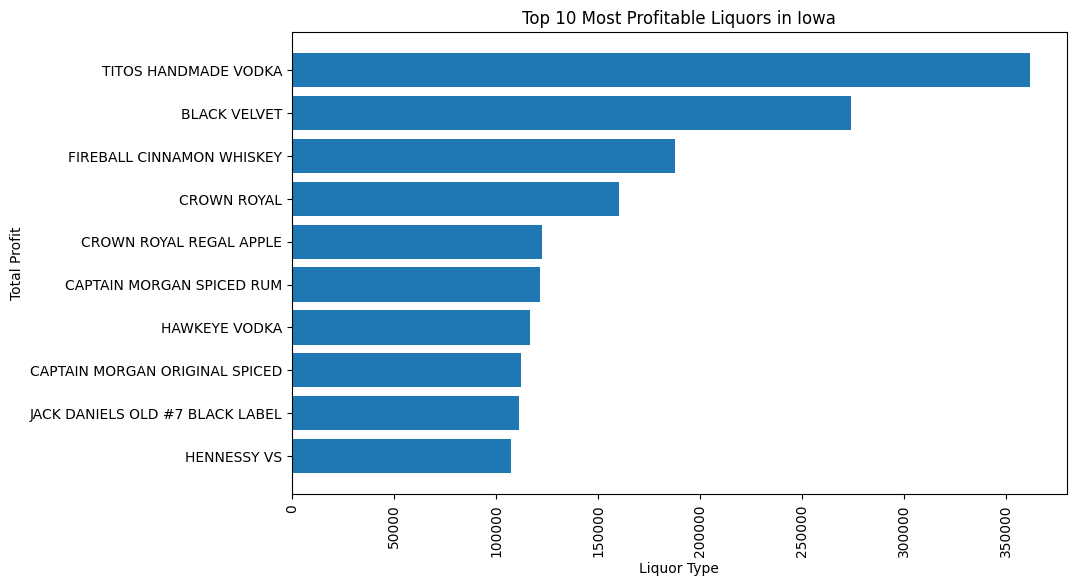

In [27]:
import matplotlib.pyplot as plt

# Cut top to 10 for visualization
top_liquors = most_profit.head(10)

# Plot the top liquors
plt.figure(figsize=(10, 6))
plt.barh(top_liquors.index, top_liquors.values)
plt.xlabel('Liquor Type')
plt.ylabel('Total Profit')
plt.title('Top 10 Most Profitable Liquors in Iowa')
plt.xticks(rotation=90) 
plt.gca().invert_yaxis()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [22]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [ ]:
# x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Trying to subtract y from x results in a `ValueError`. This is because the number of columns that x has does not match the number of rows that y has.

In [12]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

The output we got was a 3x2 array. This is because the x array is being reshaped into a 3x1 array. On the y side, the reversal of the -1 and 1 essentailly makes `x.reshape(-1,1)` a static change. This transformation doesnt change the shape of y at all, it remains a 1x2 row vector.

In [ ]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[2],
       [5]])

Since we switched which vector would be transposed, the end result will also be transposed. So instead of a 3x2 vector like last time, we now have a 2x3 vector.

In [17]:
result1 = np.zeros((len(x), len(y)))
result2 = np.zeros((len(y), len(x)))
for i in range(len(x)):
    for j in range(len(y)):
        result1[i, j] = x[i] - y[j]
        result2[j, i] = x[i] - y[j]
print(result1)
print(result2)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


In the two reshape functions, `x.reshape(-1,1)` transposes the array: it flips the values in its rows and flips them into the values as columns. In our example it transforms this 1x3 to a 3x1 array. On the other hand, `x.reshape(1,-1)` does nothing in actual practice. 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

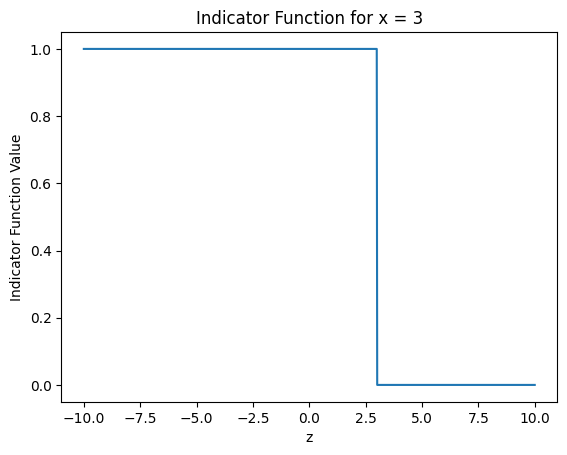

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Indicator function
def indicator_function(z, x=3):
    return np.where(z <= x, 1, 0)

# Array of z
z = np.linspace(-10, 10, 1000)

# Evaluate the indicator function for each z value
y = indicator_function(z)

# Plot the indicator function
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('Indicator Function Value')
plt.title('Indicator Function for x = 3')
plt.show()

Since I{x <= z} will always equal 1 from the indicator function expressed above, 1 - 1 will equal 0, which is the same value of I{x > z}.

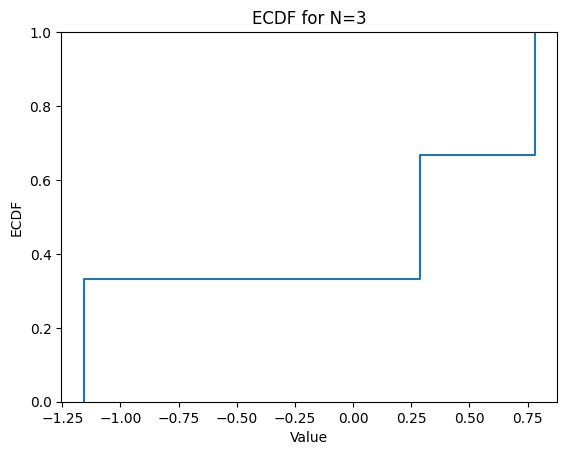

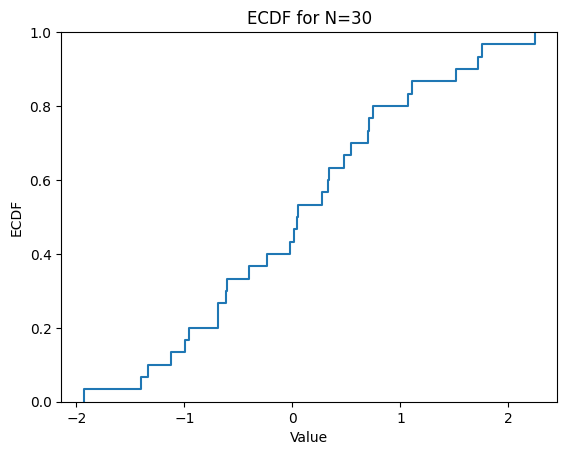

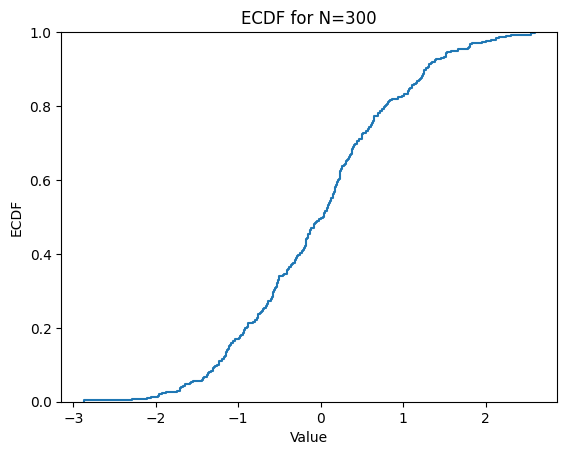

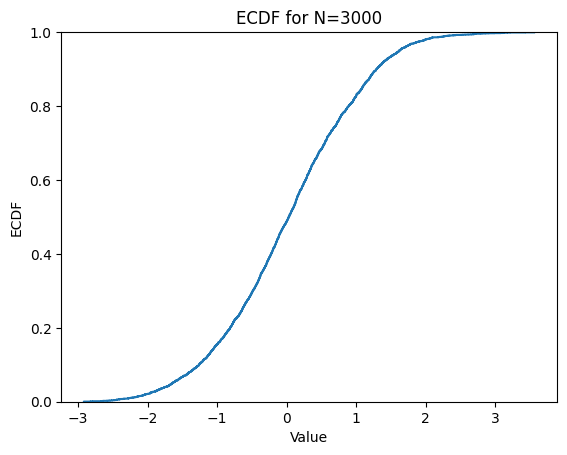

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(X)
    plt.title(f'ECDF for N={N}')
    plt.xlabel('Value')
    plt.ylabel('ECDF')    
    plt.show()

As the sample size N increases, an ECDF curve becomes a better and better approximation of the true CDF of the underlying distribution. For our example,  we sampled from a normal distribution, so the ECDF curve approaches the normal distribution CDF as N gets larger. Eventually, the steps geet so small that you dont see the jagged nature of the steps. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [36]:
# Numpy Quantile Substitute
def compute_quantile(data, q):
    sorted_data = sorted(data)
    index = (len(sorted_data) - 1) * q
    lower_index = int(index)
    if index == lower_index:
        return sorted_data[lower_index]
    else:
        return (sorted_data[lower_index] + sorted_data[lower_index + 1]) / 2

In [37]:
# IQR + Whiskers
def compute_iqr_and_whiskers(data):
    q1 = compute_quantile(data, 0.25)
    q3 = compute_quantile(data, 0.75)
    iqr = q3 - q1

    whisker_lower = q1 - 1.5 * iqr
    whisker_upper = q3 + 1.5 * iqr
    
    return iqr, whisker_lower, whisker_upper

In [38]:
# Five-Number Summary
def compute_five_number_summary(data):
    min_val = min(data)
    q1 = compute_quantile(data, 0.25)
    median = compute_quantile(data, 0.5)
    q3 = compute_quantile(data, 0.75)
    max_val = max(data)

    iqr, whisker_lower, whisker_upper = compute_iqr_and_whiskers(data)
    
    return min_val, q1, median, q3, max_val, whisker_lower, whisker_upper

In [48]:
# Outliers
def find_outliers(data, whisker_lower, whisker_upper):
    return [x < whisker_lower or x > whisker_upper for x in data]

##### Example Usage

In [ ]:
# Iowa Bottles Sold
bottles_sold = iowa['Bottles Sold'].tolist()

# Perform compute_quantile
quantiles = [compute_quantile(bottles_sold, q) for q in [0.25, 0.5, 0.75]]
print("Quantiles (0.25, 0.5, 0.75):", quantiles)

Quantiles (0.25, 0.5, 0.75): [3.0, 6.0, 12.0]


In [ ]:
# Compute IQR and Whiskers
iqr_and_whiskers = compute_iqr_and_whiskers(bottles_sold)
print("IQR and Whiskers (IQR, Lower Whisker, Upper Whisker):", iqr_and_whiskers)

IQR and Whiskers (IQR, Lower Whisker, Upper Whisker): (9.0, -10.5, 25.5)


In [42]:
# Compute Five Number Summary
five_number_summary = compute_five_number_summary(bottles_sold)
print("Five-Number Summary (Min, Q1, Median, Q3, Max, Lower Whisker, Upper Whisker):", five_number_summary)

Five-Number Summary (Min, Q1, Median, Q3, Max, Lower Whisker, Upper Whisker): (-60, 3.0, 6.0, 12.0, 2400, -10.5, 25.5)


In [52]:
# Outliers
outliers = find_outliers(bottles_sold, iqr_and_whiskers[1], iqr_and_whiskers[2])

outlier_indices = np.where(outliers)[0]
print(f"Number of outliers: {len(outlier_indices)}")

Number of outliers: 7651


##### Check with Box plot + .describe

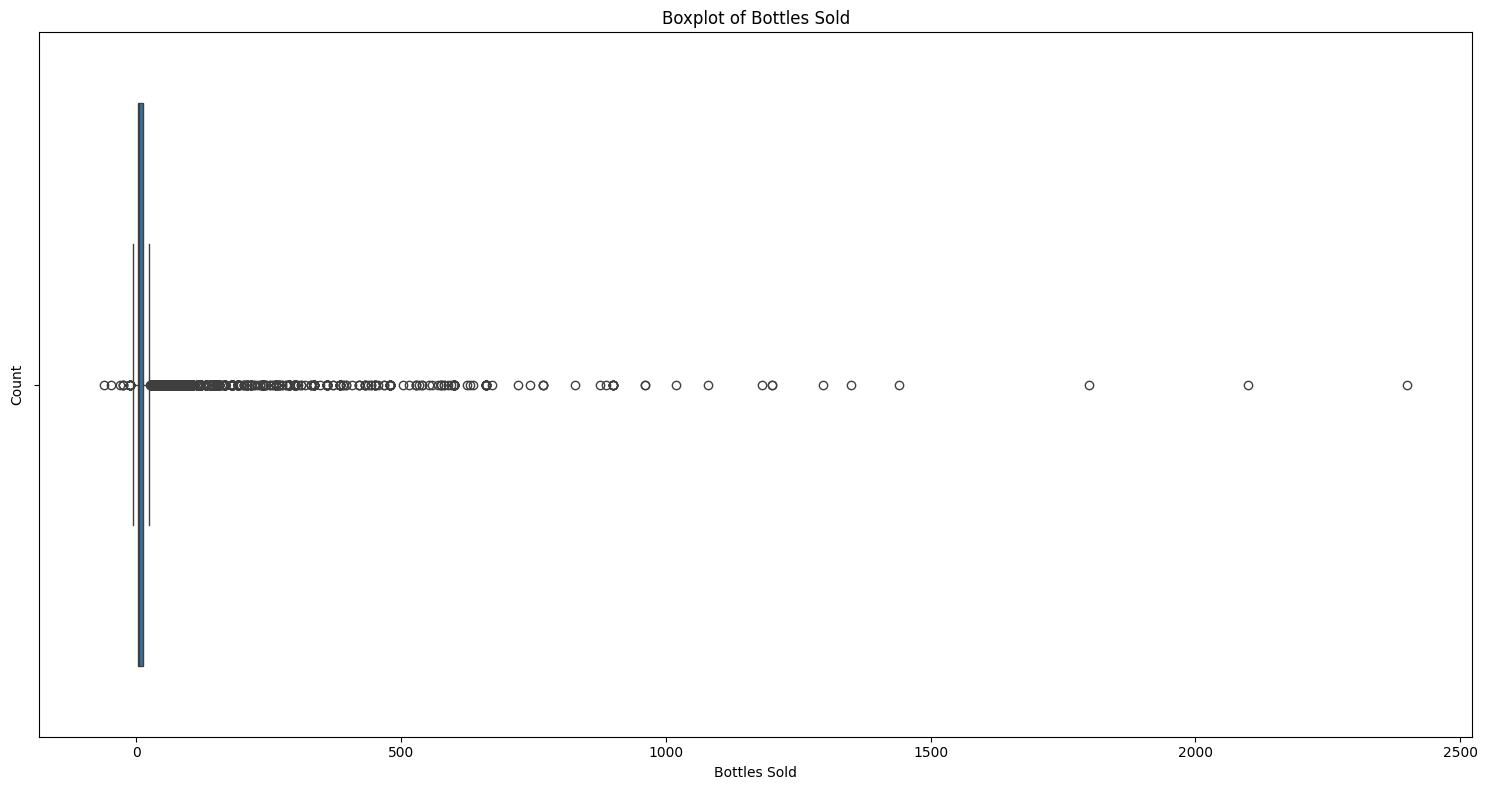

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(bottles_sold, orient='h')
plt.xlabel('Bottles Sold')
plt.ylabel('Count')
plt.title('Boxplot of Bottles Sold')
plt.tight_layout()
plt.show()

In [60]:
# Describe
print(iowa['Bottles Sold'].describe())

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64


When comparing my five number summary to the `.describe` function, the numbers align perfectly, ensuring that my calculation for these numbers is correct in paractice.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?